In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(np.sort([c for c in df.columns]))

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT

## Missing Data

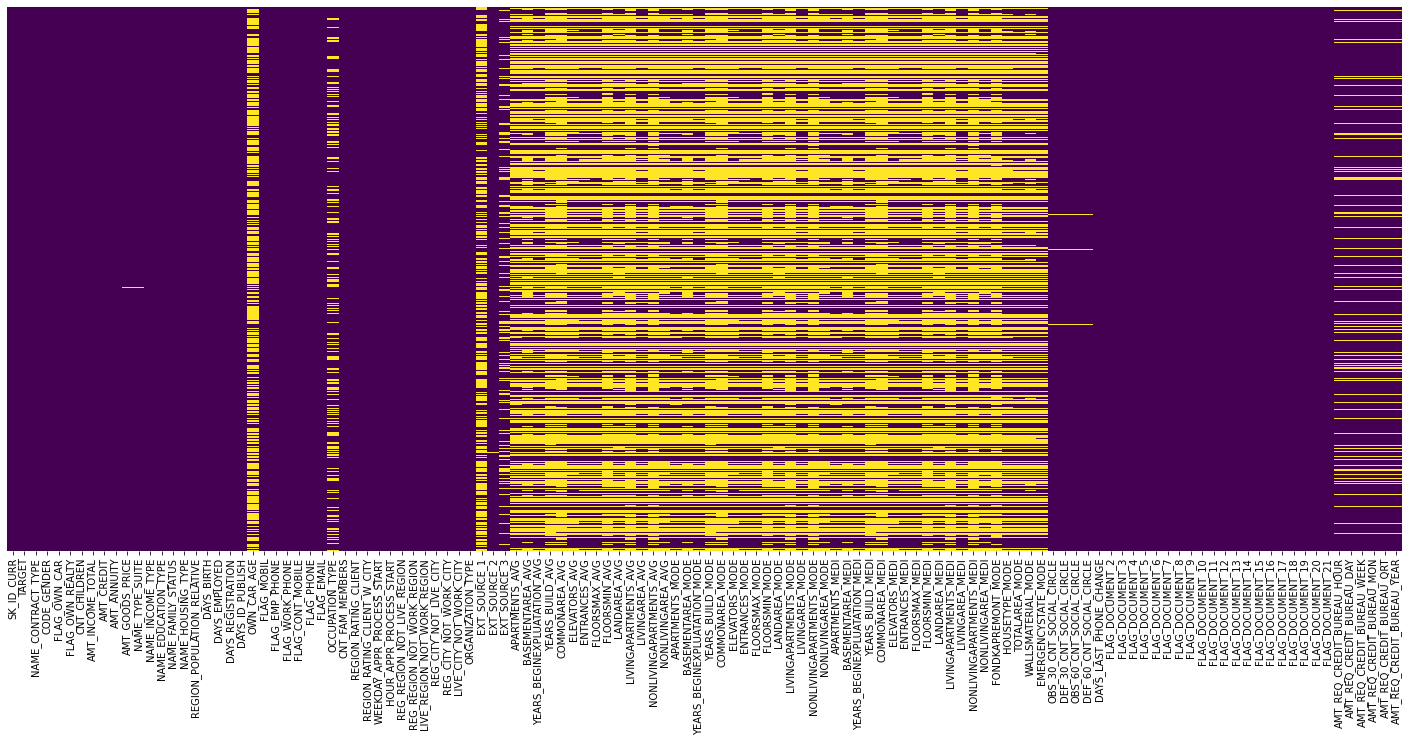

In [5]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

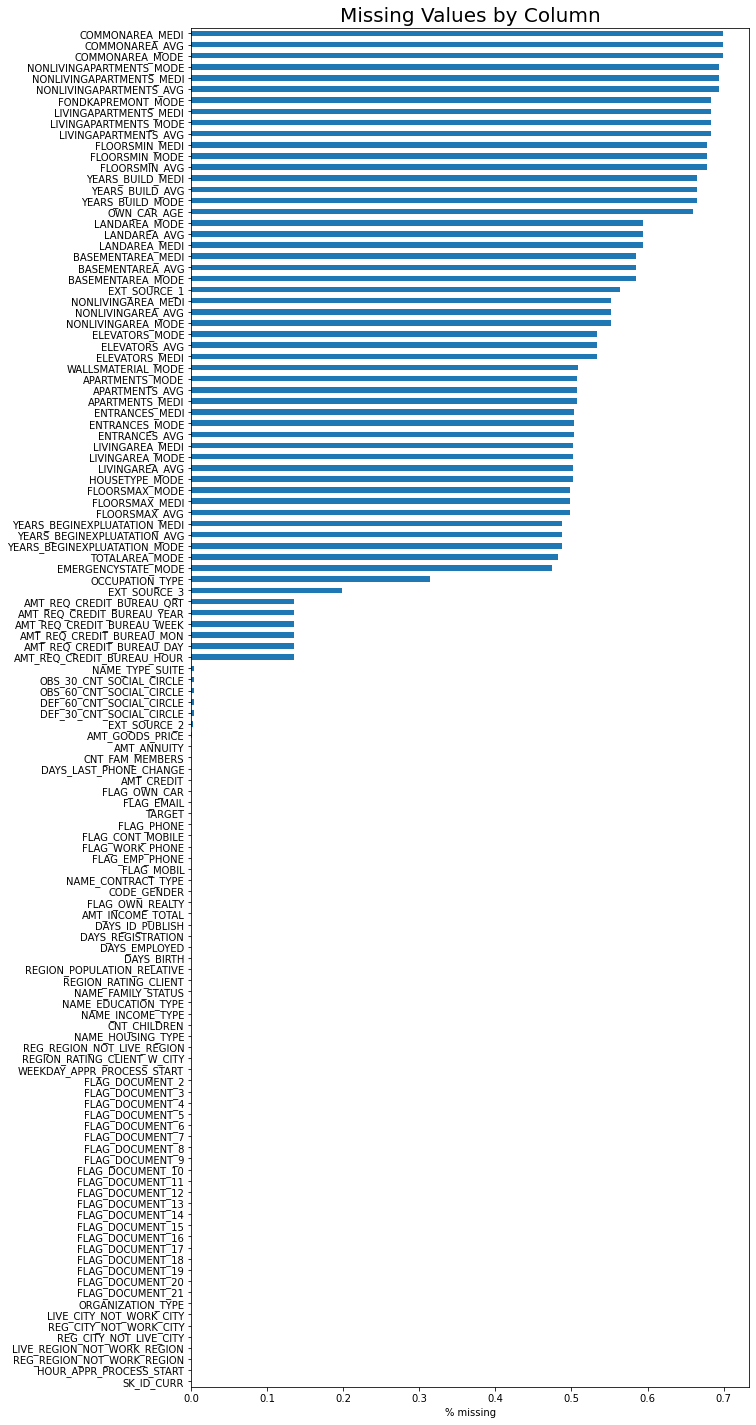

In [6]:
fig, ax = plt.subplots(figsize=(10, 25))
ax = (df.isna().sum() / len(df)).sort_values().plot.barh()
ax.set_xlabel('% missing')
ax.set_title('Missing Values by Column', fontsize=20)
plt.show()

In [7]:
len(df.columns[df.isna().any()]) 

67

In [8]:
len(df[df.isna().any(axis=1)])

298909

In [9]:
len(df.columns[df.isna().sum() / len(df) >= 0.2])

50

In [56]:
len(df.columns[(df.isna().sum() / len(df) < 0.2) & (df.isna().sum() > 0)])

17

In [11]:
df['TARGET'].mean()

0.08072881945686496

## Dummify Categorical Variables

In [12]:
cat_cols = list(df.columns[df.dtypes == 'O'])
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [13]:
len(cat_cols)

16

In [14]:
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first=True)

In [15]:
df = pd.concat([df, dummies], axis=1).drop(columns=cat_cols)

## Correlations

In [16]:
corr_matrix = df.corr()

In [17]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

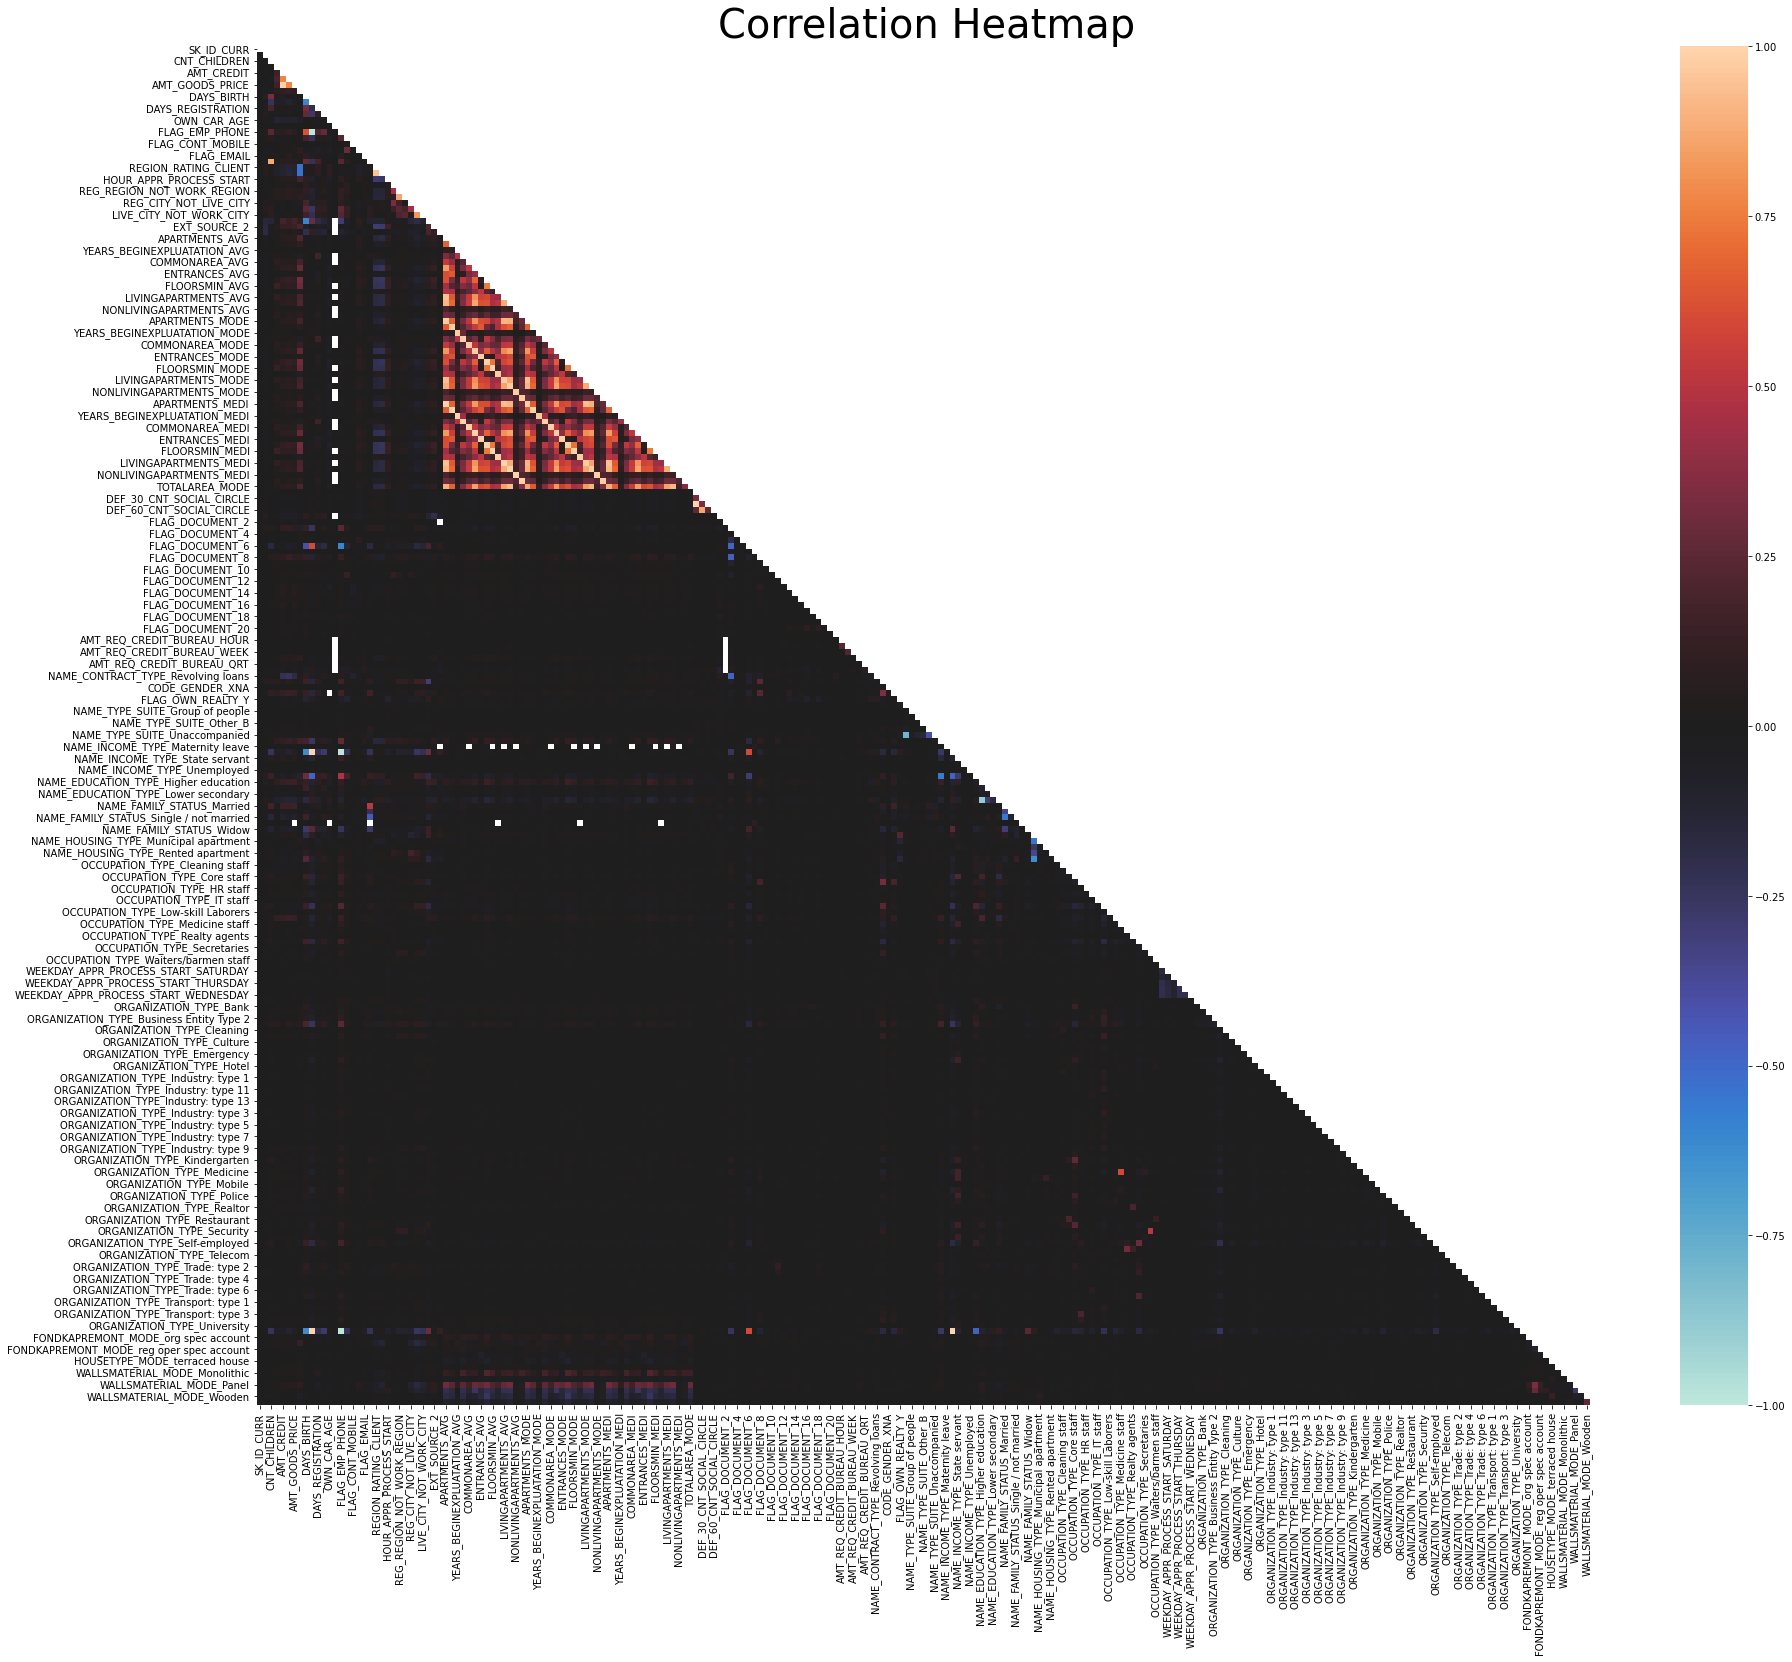

In [18]:
fig, ax = plt.subplots(figsize=(30, 25))
ax = sns.heatmap(corr_matrix,
            mask=mask,
            vmin=-1,
            vmax=1,
            center=0
)
ax.set_title('Correlation Heatmap', fontsize=40)
plt.show()

In [19]:
corr_matrix.min()

SK_ID_CURR                        -0.004139
TARGET                            -0.178919
CNT_CHILDREN                      -0.240722
AMT_INCOME_TOTAL                  -0.117273
AMT_CREDIT                        -0.221648
                                     ...   
WALLSMATERIAL_MODE_Others         -0.044132
WALLSMATERIAL_MODE_Panel          -0.270257
WALLSMATERIAL_MODE_Stone, brick   -0.270257
WALLSMATERIAL_MODE_Wooden         -0.252245
EMERGENCYSTATE_MODE_Yes           -0.138289
Length: 230, dtype: float64

In [20]:
corr_matrix['TARGET'].sort_values(ascending=False)

TARGET                                  1.000000
DAYS_BIRTH                              0.078239
REGION_RATING_CLIENT_W_CITY             0.060893
REGION_RATING_CLIENT                    0.058899
NAME_INCOME_TYPE_Working                0.057481
                                          ...   
NAME_INCOME_TYPE_Pensioner             -0.046209
NAME_EDUCATION_TYPE_Higher education   -0.056593
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
Name: TARGET, Length: 230, dtype: float64

## Mutual Information

In [21]:
nonulls_df = df.dropna(axis=0)
y = nonulls_df['TARGET']
X = nonulls_df.drop(columns=['TARGET'])

In [22]:
mutual_info = mutual_info_classif(X, y, random_state=1)

In [23]:
mutual_info_df = pd.DataFrame({
    'feature': X.columns,
    'mutual_info': mutual_info
}).sort_values('mutual_info', ascending=False)

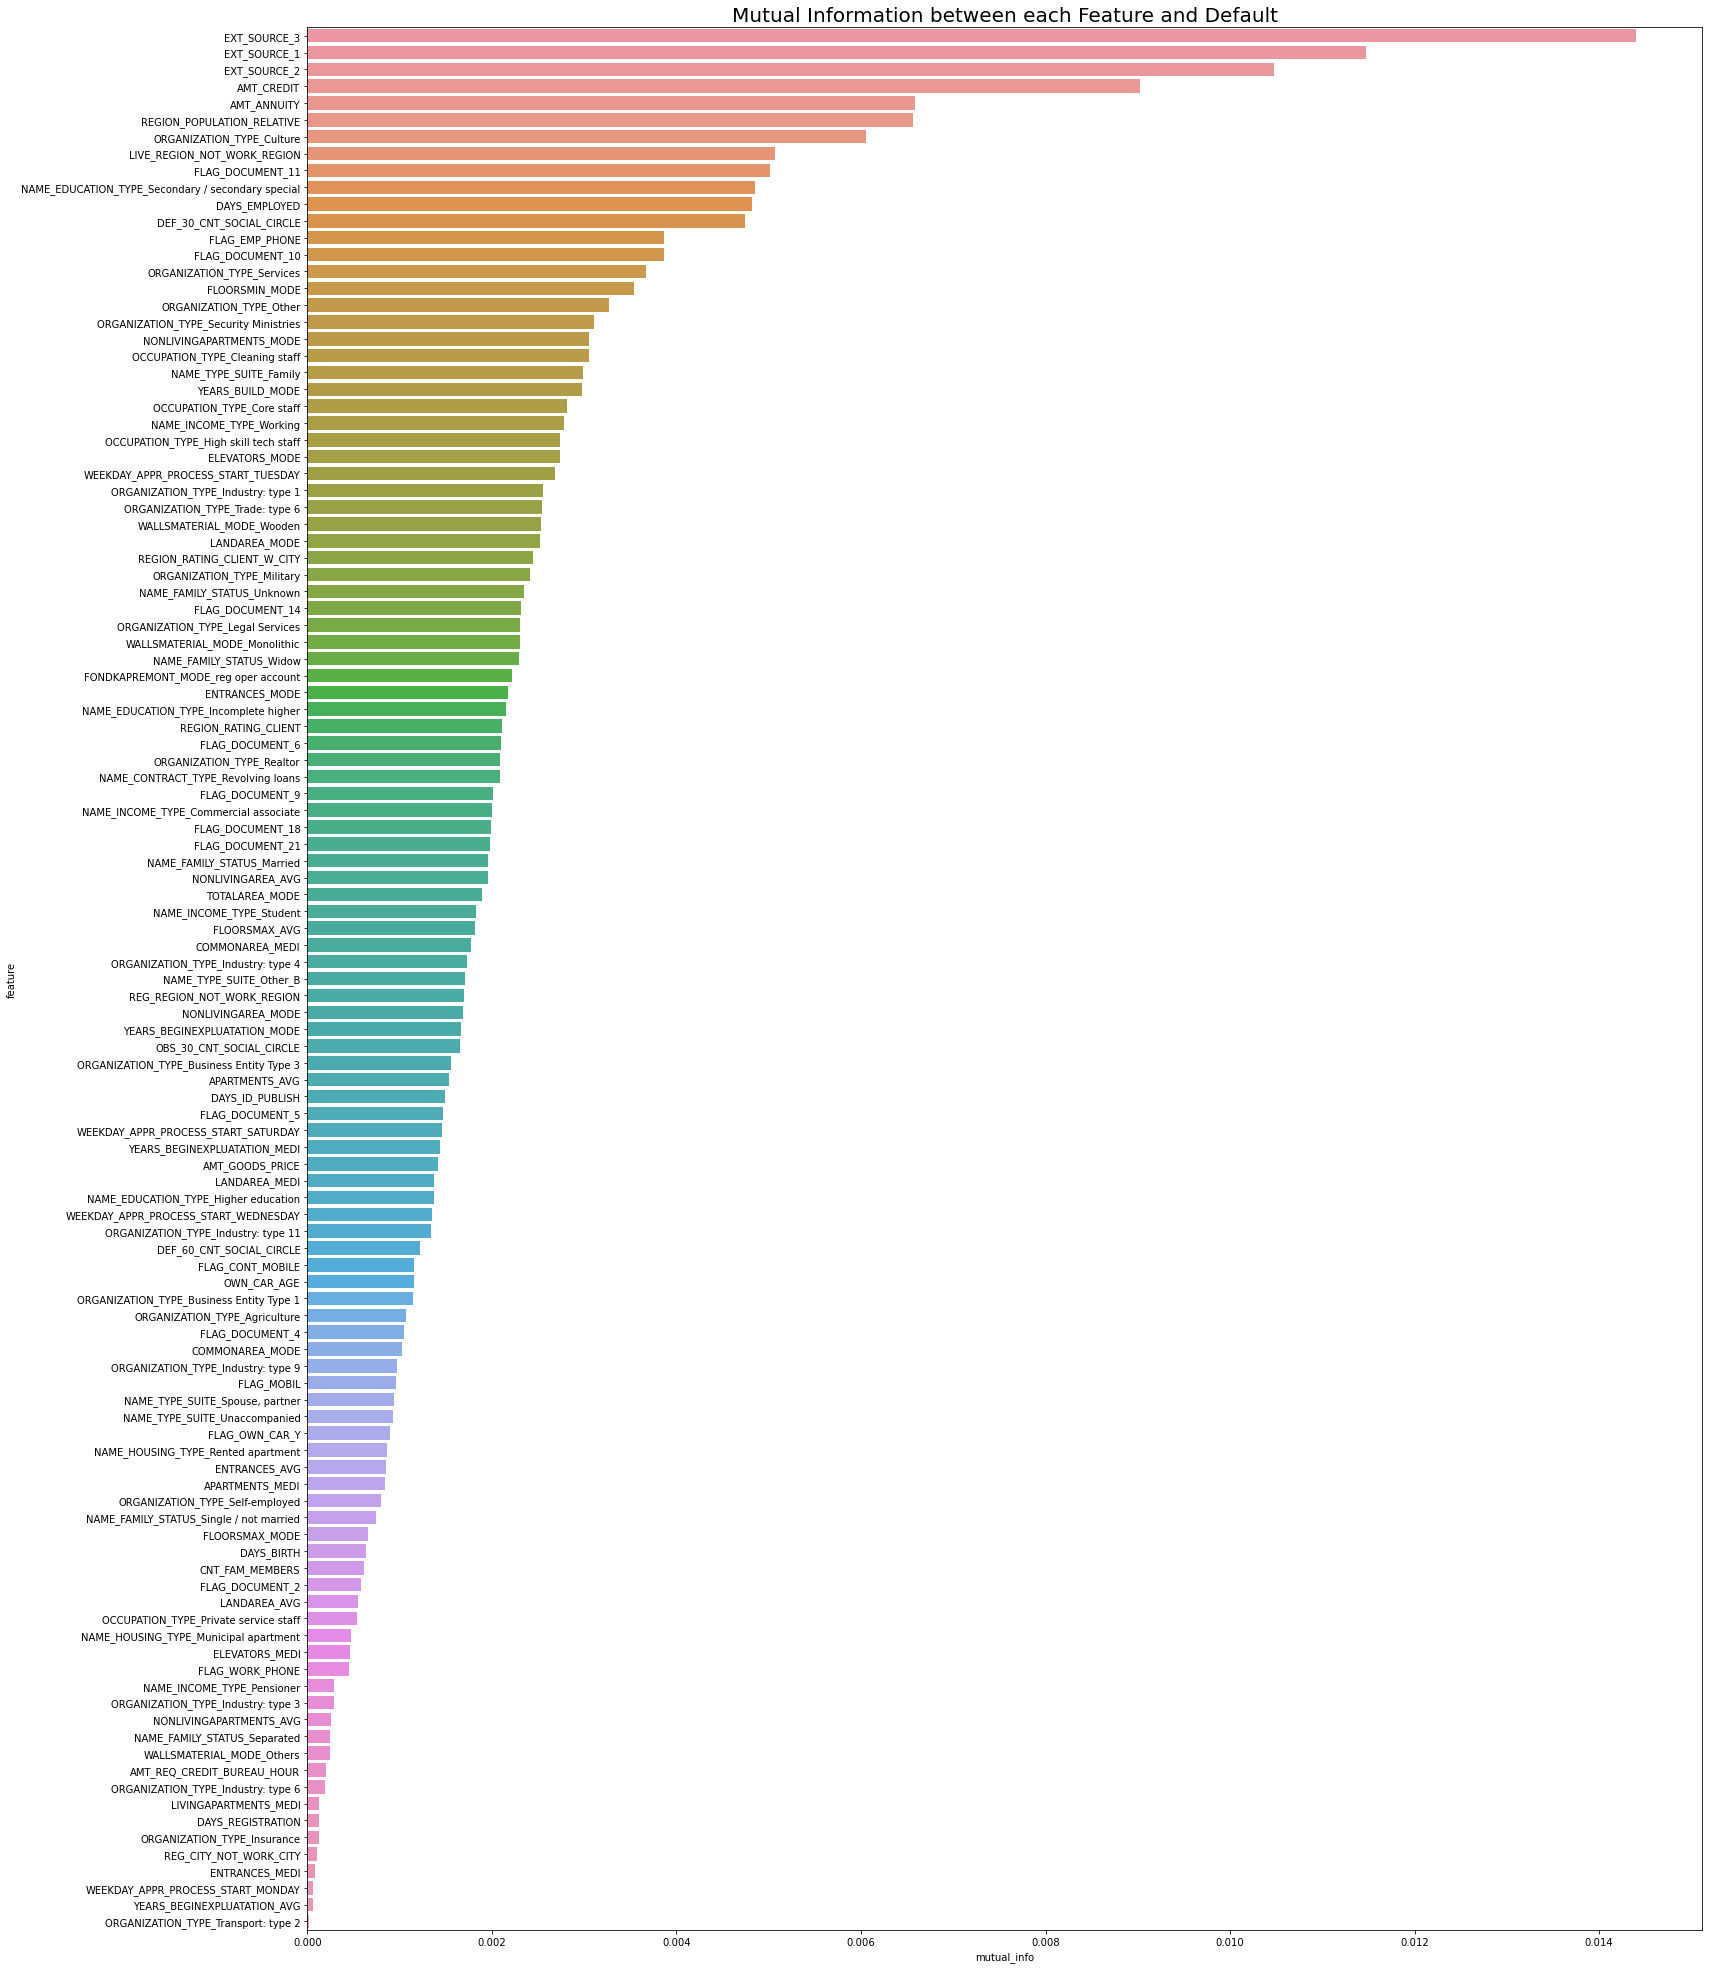

In [24]:
fig, ax = plt.subplots(figsize=(25, 35))
ax = sns.barplot(
    data=mutual_info_df[mutual_info_df['mutual_info'] > 0],
    y='feature',
    x='mutual_info',
    orient='h'
)
ax.set_title('Mutual Information between each Feature and Default', fontsize=20)
plt.show()

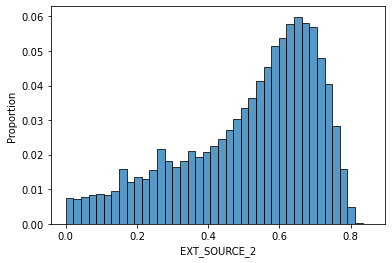

In [25]:
fig, ax = plt.subplots()
ax = sns.histplot(
    data=df,
    x='EXT_SOURCE_2',
    stat='proportion',
    bins=40
)
plt.show()

In [26]:
df['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

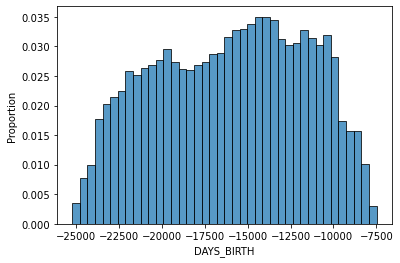

In [27]:
fig, ax = plt.subplots()
ax = sns.histplot(
    data=df,
    x='DAYS_BIRTH',
    stat='proportion',
    bins=40
)
plt.show()

In [28]:
df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [29]:
target_colors = ['springgreen', 'red']

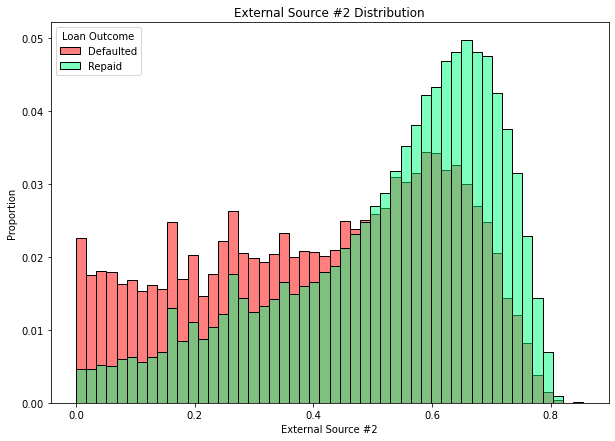

In [30]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.histplot(
    data=df,
    x='EXT_SOURCE_2',
    hue='TARGET',
    stat='proportion',
    bins=50,
    common_norm=False,
    legend=False,
    palette=target_colors
)
ax.set(xlabel='External Source #2')
plt.legend(title='Loan Outcome', loc='upper left', labels=['Defaulted', 'Repaid']) 
plt.title('External Source #2 Distribution')
plt.show()

In [31]:
df['EXT_SOURCE_2_LOW'] = (df['EXT_SOURCE_2'] <= 0.5).astype(int)

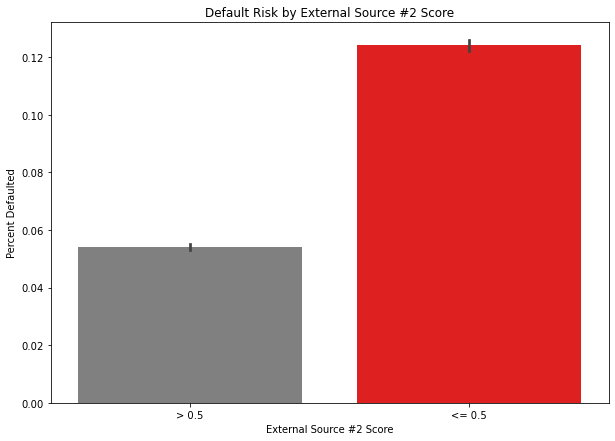

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(
    data=df,
    x='EXT_SOURCE_2_LOW',
    y='TARGET',
    palette=['gray', 'red']
)
ax.set(
    xlabel='External Source #2 Score', 
    xticklabels=['> 0.5', '<= 0.5'], 
    ylabel='Percent Defaulted',
    title='Default Risk by External Source #2 Score'
)
plt.show()

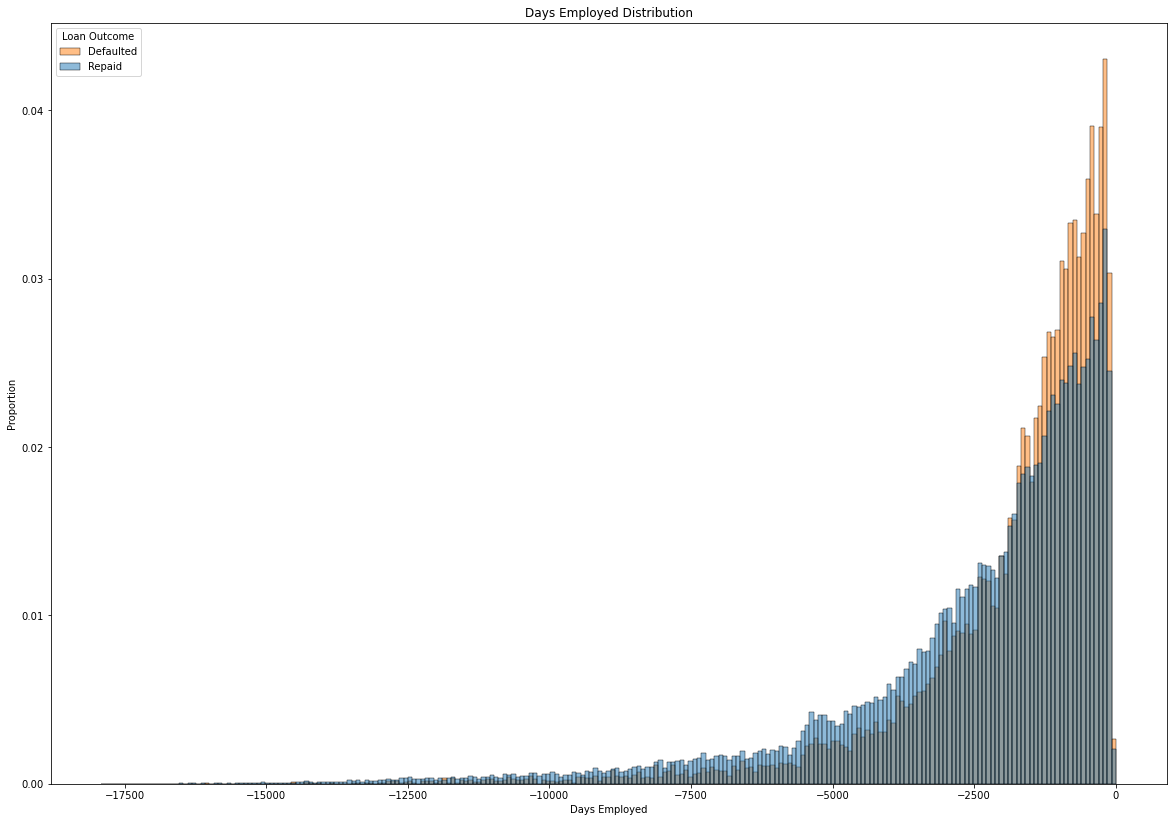

In [33]:
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.histplot(
    data=df[df['DAYS_EMPLOYED'] != 365243],
    x='DAYS_EMPLOYED',
    hue='TARGET',
    stat='proportion',
    #bins=50,
    common_norm=False,
    legend=False
)
ax.set(xlabel='Days Employed')
plt.legend(title='Loan Outcome', loc='upper left', labels=['Defaulted', 'Repaid'])
plt.title('Days Employed Distribution')
plt.show()

In [34]:
df[df['DAYS_EMPLOYED'] < -2000].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,EXT_SOURCE_2_LOW
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,1
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,0,0,0,0,0,0
12,100016,0,0,67500.0,80865.0,5881.5,67500.0,0.031329,-13439,-2717,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Annuity Amount Distribution')

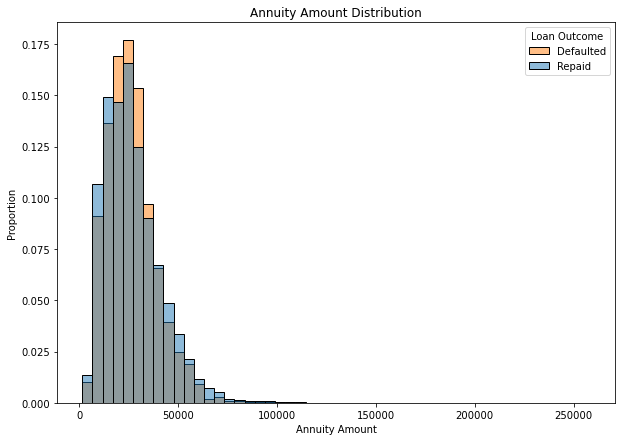

In [44]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.histplot(
    data=df,
    x='AMT_ANNUITY',
    hue='TARGET',
    stat='proportion',
    common_norm=False,
    legend=False,
    bins=50
)
ax.set(xlabel='Annuity Amount')
plt.legend(title='Loan Outcome', loc='upper right', labels=['Defaulted', 'Repaid'])
plt.title('Annuity Amount Distribution')

In [46]:
outcome_pct = df['TARGET'].value_counts(normalize=True).mul(100)
outcome_pct

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [47]:
bar = pd.DataFrame(
    {
        'repaid': [outcome_pct[0]], 
        'defaulted': outcome_pct[1],
    },
    index=['loan outcome']
)
bar

,repaid,defaulted
loan outcome,91.927118,8.072882


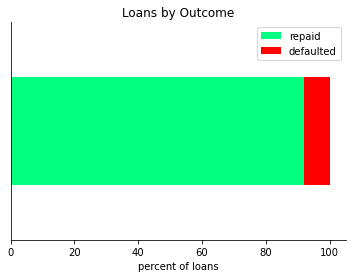

In [48]:
fig, ax = plt.subplots()
bar.plot.barh(
    stacked=True, 
    color=target_colors,
    ax=ax
)
ax.set(
    title='Loans by Outcome',
    xlabel='percent of loans'
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.show()